<a href="https://colab.research.google.com/github/Bagewadinitin/ML_projects_Classification/blob/main/Magic_Telescope_rays_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [18]:
pip install imbalanced-learn

## DataSet:

https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

In [2]:
cols=['fLength', 'fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
df=pd.read_csv('magic04.data', names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [4]:
# converting class feature categorical data to numerical data
df['class']=(df['class'] == 'g').astype(int)

In [5]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


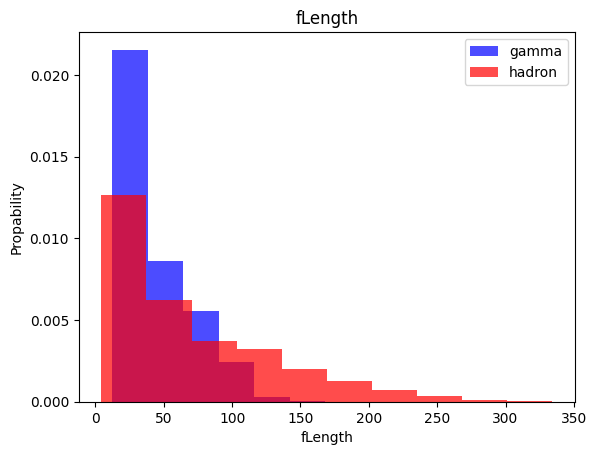

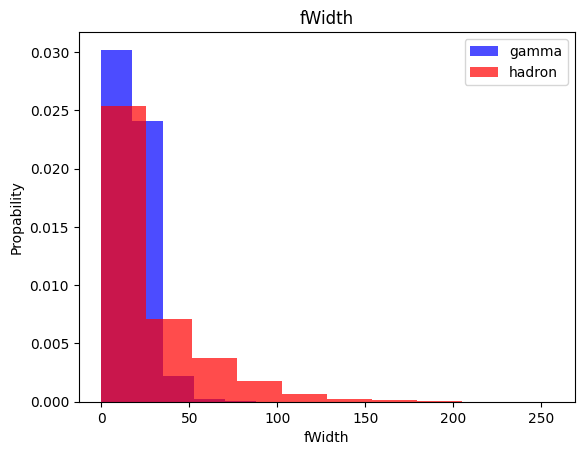

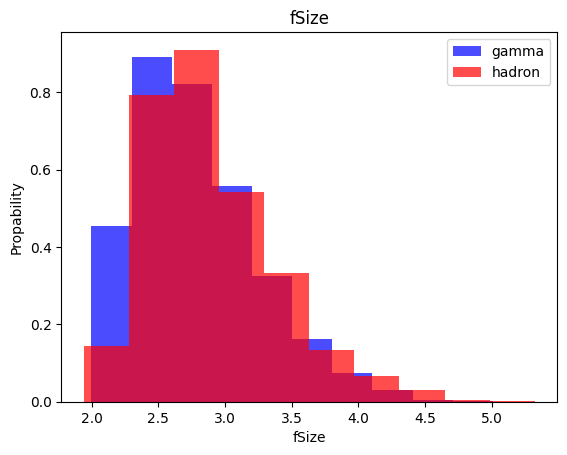

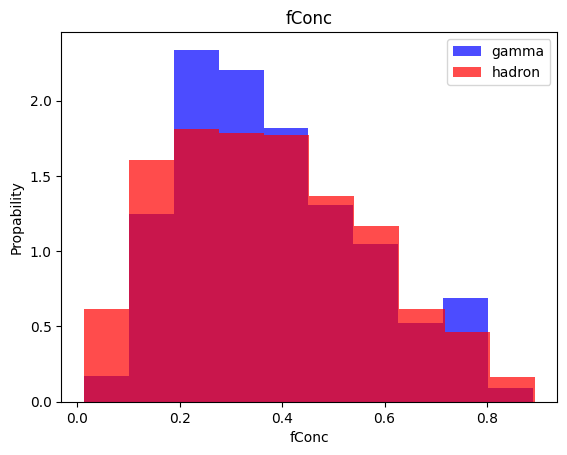

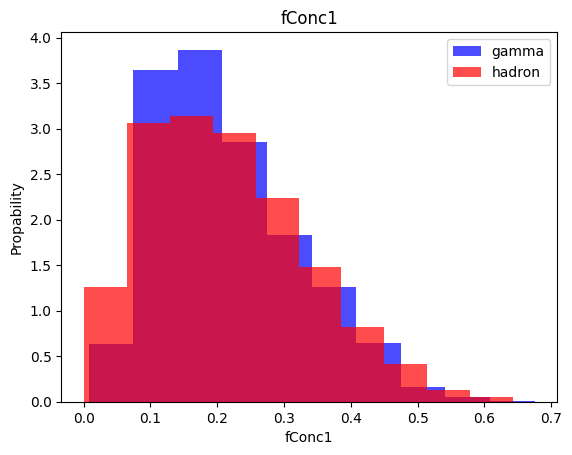

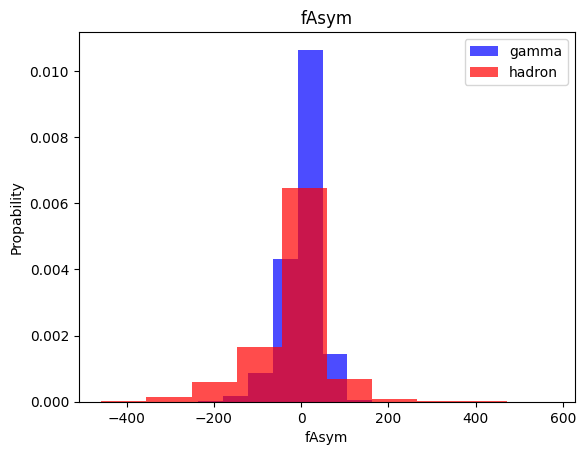

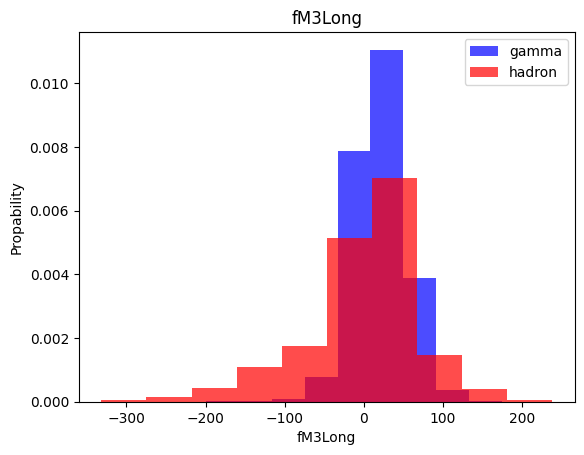

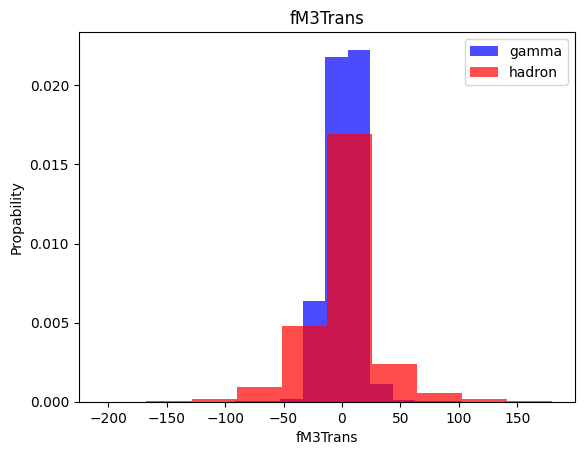

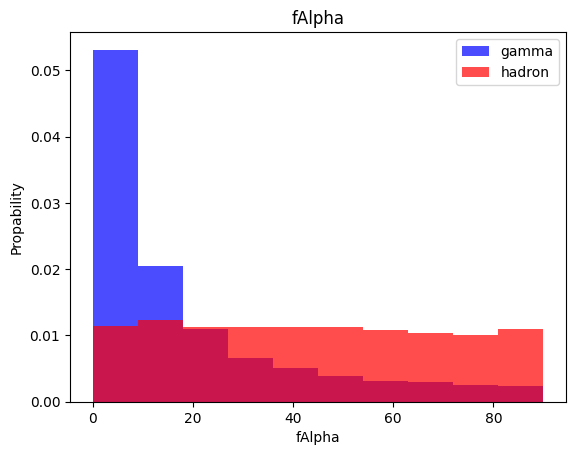

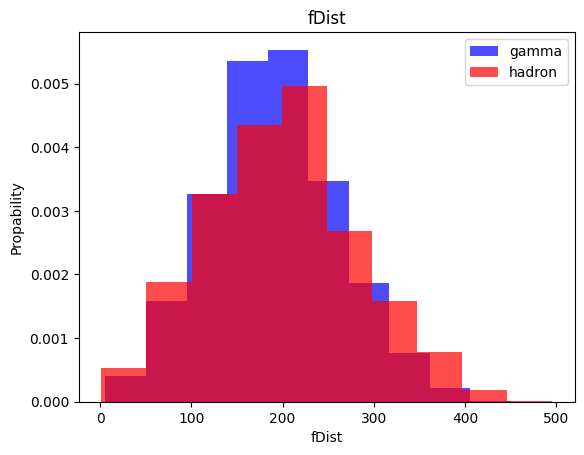

In [6]:
# try to check for gamma and hadron rays distribution using histogram
for label in df.columns[:-1]:
  plt.hist(df[df['class']==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df['class']==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel('Propability')
  plt.legend()
  plt.show()



# Train, Validation and test dataset

In [30]:
# splitting the data using numpy library
train, valid, test=np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [31]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scalar = StandardScaler()
  X = scalar.fit_transform(X)

  if oversample: # converting imbalanced dataset to balanced dataset
    ros=RandomOverSampler()
    X,y=ros.fit_resample(X,y)

  data = np.hstack((X, np.reshape(y, (-1,1)) ))

  return data, X, y

In [32]:
train, X_train, y_train=scale_dataset(train, oversample=True )
valid, X_valid, y_valid=scale_dataset(valid, oversample=False )
test, X_test, y_test=scale_dataset(test, oversample=False )

In [33]:
sum(y_train ==1) # checking for balanced dataset


7446

In [34]:
sum(y_train ==0)

7446

KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [39]:
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [40]:
y_pred =knn_model.predict(X_test)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.71      0.73      1372
           1       0.84      0.86      0.85      2432

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



Naive Bays

In [42]:
from sklearn.naive_bayes import GaussianNB

In [43]:
nb_model=GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [45]:
nb_y_pred=nb_model.predict(X_test)

In [46]:
print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

           0       0.72      0.40      0.51      1372
           1       0.73      0.91      0.81      2432

    accuracy                           0.73      3804
   macro avg       0.73      0.66      0.66      3804
weighted avg       0.73      0.73      0.70      3804



Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
lg_model=LogisticRegression()
lg_model.fit(X_train, y_train)

LogisticRegression()

In [49]:
lg_y_pred=lg_model.predict(X_test)

In [50]:
print(classification_report(y_test, lg_y_pred))

              precision    recall  f1-score   support

           0       0.70      0.71      0.71      1372
           1       0.84      0.83      0.83      2432

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



In [51]:
from sklearn.svm import SVC

In [52]:
sv_model=SVC()
sv_model.fit(X_train, y_train)

SVC()

In [53]:
sv_y_pred=sv_model.predict(X_test)

In [56]:
print(classification_report(y_test, sv_y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1372
           1       0.89      0.90      0.89      2432

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



NN Classification

In [57]:
import tensorflow as tf

In [75]:
def plot_history(history):
  fig, (ax1, ax2)=plt.subplots(1,2)
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary Crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()
  ax2.grid(True)

  plt.show()


In [73]:
from re import VERBOSE
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):

  nn_model=tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation= 'relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation= 'relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss= 'binary_crossentropy', metrics=['accuracy'])

  history=nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32
Epoch 1/100
373/373 [==============================] - 2s 4ms/step - loss: 0.4061 - accuracy: 0.8204 - val_loss: 0.4484 - val_accuracy: 0.7761
Epoch 2/100
373/373 [==============================] - 1s 3ms/step - loss: 0.3580 - accuracy: 0.8480 - val_loss: 0.5480 - val_accuracy: 0.7237
Epoch 3/100
373/373 [==============================] - 1s 2ms/step - loss: 0.3444 - accuracy: 0.8548 - val_loss: 0.4853 - val_accuracy: 0.7590
Epoch 4/100
373/373 [==============================] - 1s 2ms/step - loss: 0.3356 - accuracy: 0.8555 - val_loss: 0.4716 - val_accuracy: 0.7513
Epoch 5/100
373/373 [==============================] - 1s 2ms/step - loss: 0.3337 - accuracy: 0.8576 - val_loss: 0.4734 - val_accuracy: 0.7687
Epoch 6/100
373/373 [==============================] - 1s 2ms/step - loss: 0.3299 - accuracy: 0.8586 - val_loss: 0.5226 - val_accuracy: 0.7375
Epoch 7/100
373/373 [==============================] - 1s 2ms/step - loss: 0.3289 - accuracy: 0.86

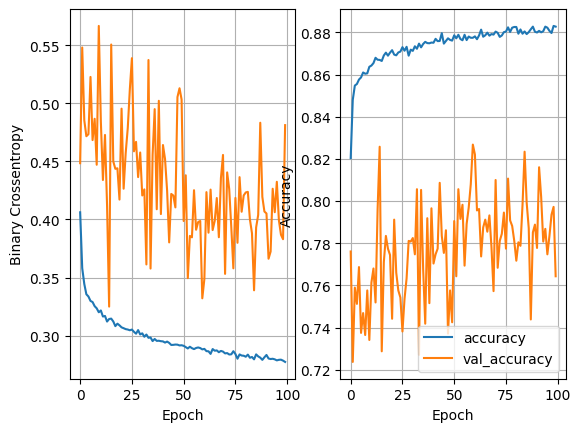

119/119 [==============================] - 0s 1ms/step - loss: 0.3208 - accuracy: 0.8720


TypeError: ignored

In [77]:
least_val_loss= float('inf')
least_loss_model= None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f'{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}')
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss=model.evaluate(X_valid, y_valid)
        if val_loss < least_loss_model:
          least_val_loss = val_loss
          least_loss_model = model

In [78]:
y_pred=least_loss_model.predict(X_test)
y_pred=(y_pred > 0.5).astype(int).reshape(-1,)

AttributeError: ignored

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.71      0.73      1372
           1       0.84      0.86      0.85      2432

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804

